In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df1 = pd.DataFrame(np.random.rand(1000, 5), columns=['A', 'B', 'C', 'D', 'E'])
df1.head(2)

,A,B,C,D,E
0,0.420997,0.562956,0.482889,0.464087,0.706939
1,0.988820,0.313047,0.342954,0.370695,0.343492


In [4]:
df2 = pd.read_csv('../data/P87-S5-Grouping-Resources/train.csv',
                  parse_dates=["Date"], low_memory=False)
df2.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


### Use apply() COLUMN-WISE to DATA

In [5]:
def max_min(columns):
    diff = columns.max() - columns.min()
    return diff

In [6]:
df1.apply(max_min)

A    0.997238
B    0.995051
C    0.998363
D    0.998469
E    0.998731
dtype: float64

### Use apply() ROW-WISE to DATA

In [7]:
def sums(row):
    return row['A'] + row['B'] + row['C'] + row['D'] + row['E'] 

In [10]:
df1['SUM'] = df1.apply(sums, axis=1)
df1.head(2)

,A,B,C,D,E,SUM
0,0.420997,0.562956,0.482889,0.464087,0.706939,2.637869
1,0.988820,0.313047,0.342954,0.370695,0.343492,2.359007


### Use apply() for Sophisticate function

In [11]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [95]:
def best_2015_store(row):
    date = pd.to_datetime(row.Date)
    if (row.Customers > 837) & (date.year == 2015) & (row.Sales > 78560):
        return 'BUSY & PROFITABLE'
    elif (row.Customers > 837) & (date.year == 2015):
        return 'BUSY'
    elif (row.Sales > 78560) & (date.year == 2015):
        return 'PROFITABLE'
    elif (date.year == 2015):
        return 'NORMAL'
    else:
        return "OUTLIER"
        

In [97]:
df_n = df2.copy()
df_n["2015"] = df_n.apply(best_2015_store, axis=1)

In [104]:
df_n[["Date", "2015"]].head(2)

,Date,2015
0,2015-07-31,NORMAL
766335,2013-08-13,OUTLIER


In [37]:
df3 = {'A': np.random.normal(loc=10, scale=20, size=1000),
      'B': np.random.exponential(scale=5, size=1000),
      'C': np.random.randint(10, size=1000)}
df3 = pd.DataFrame(df3)
df3.head()

,A,B,C
0,28.303752,13.960288,3
1,2.971212,1.063798,8
2,3.467566,4.092073,5
3,2.556651,3.719919,6
4,31.019526,3.528092,7


In [54]:
def normalizer(row):
    t = (row - row.mean())/ row.std()
    return t

In [55]:
df3.transform(normalizer)

,A,B,C
0,0.944423,1.968793,-0.544014
1,-0.334108,-0.804361,1.207480
2,-0.309057,-0.153186,0.156584
3,-0.355031,-0.233211,0.506883
4,1.081488,-0.274460,0.857181
...,...,...,...
995,0.736427,0.744793,1.207480
996,-1.641676,-0.642889,0.857181
997,-0.103061,0.482836,0.506883
998,2.028254,8.192235,1.207480


In [56]:
df3.apply(normalizer)

,A,B,C
0,0.944423,1.968793,-0.544014
1,-0.334108,-0.804361,1.207480
2,-0.309057,-0.153186,0.156584
3,-0.355031,-0.233211,0.506883
4,1.081488,-0.274460,0.857181
...,...,...,...
995,0.736427,0.744793,1.207480
996,-1.641676,-0.642889,0.857181
997,-0.103061,0.482836,0.506883
998,2.028254,8.192235,1.207480


In [50]:
df3.sum()

A    9591.158883
B    4804.459718
C    4553.000000
dtype: float64

### TRANSFORM VS APPLY

In [59]:
df5 = pd.DataFrame({
    'Store': ['Store A', 'Store A', 'Store B', 'Store B'],
    'Sales': [200, 300, 400, 500]
})
df5

,Store,Sales
0,Store A,200
1,Store A,300
2,Store B,400
3,Store B,500


In [63]:
df5.groupby('Store')['Sales'].transform(lambda x: (x - x.mean()) / x.std())

0   -0.707107
1    0.707107
2   -0.707107
3    0.707107
Name: Sales, dtype: float64

In [82]:
df5.groupby('Store')['Sales'].apply(lambda x: (x-x.mean())/x.std())

/var/folders/cp/2vg0mq953918v2_1xmh8chvr0000gn/T/ipykernel_95813/2095418198.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df5.groupby('Store')['Sales'].apply(lambda x: (x-x.mean())/x.std())


0   -0.707107
1    0.707107
2   -0.707107
3    0.707107
Name: Sales, dtype: float64

In [83]:
def store_std(x):
    return (x - x.mean())/x.std()

In [84]:
df2['Store Sales STD'] = df2.Sales.transform(store_std)
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Store Sales STD
0,1,5,2015-07-31,5263.0,555,1,1,0,1,-0.132698
1,2,5,2015-07-31,6064.0,625,1,1,0,1,0.075467
2,3,5,2015-07-31,NaN,821,1,1,0,1,NaN
3,4,5,2015-07-31,13995.0,1498,1,1,0,1,2.136593
4,5,5,2015-07-31,4822.0,559,1,1,0,1,-0.247306


### Fill NULL with TRANSFORM

In [70]:
mask = np.random.choice(10, size=df2.shape[0]) == 0

In [71]:
df2.loc[mask,"Sales"] = np.nan

In [75]:
df2.groupby("Store")['Sales'].mean()

Store
1        3953.990544
2        4175.256471
3        5662.484634
4        7999.665874
5        3847.731824
            ...     
1111     4327.427208
1112     8498.647551
1113     5545.625000
1114    17199.283041
1115     5220.684947
Name: Sales, Length: 1115, dtype: float64

In [94]:
df2['Sales(fill by mean)'] = df2.groupby('Store')['Sales'].transform(lambda x: x.fillna(x.mean()))
df2.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Store Sales STD,Sales(fill by mean)
0,1,5,2015-07-31,5263.0,555,1,1,0,1,-0.132698,5263.0
766335,1,2,2013-08-13,5299.0,573,1,1,0,1,-0.123342,5299.0
951425,1,4,2013-02-28,4676.0,581,1,0,0,0,-0.285249,4676.0
372890,1,4,2014-08-07,4154.0,480,1,1,0,1,-0.420907,4154.0
373825,1,3,2014-08-06,5337.0,575,1,1,0,1,-0.113467,5337.0


In [106]:
df6 = pd.DataFrame({
    'Store': ['Store A', 'Store A', 'Store B', 'Store B'],
    'Sales': [100, 150, 200, 250],
    'Date': pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-01', '2021-01-02'])
})

df6.sort_values(by='Date', inplace=True)
df6.head()



,Store,Sales,Date
0,Store A,100,2021-01-01
2,Store B,200,2021-01-01
1,Store A,150,2021-01-02
3,Store B,250,2021-01-02


In [108]:
df6.groupby('Store')['Sales'].transform(pd.Series.cumsum)

0    100
2    200
1    250
3    450
Name: Sales, dtype: int64

<Axes: >

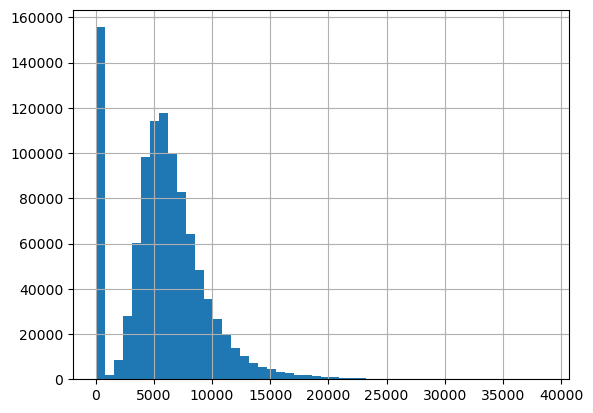

In [110]:
df2['Sales(fill by mean)'].hist(bins=50)

<Axes: >

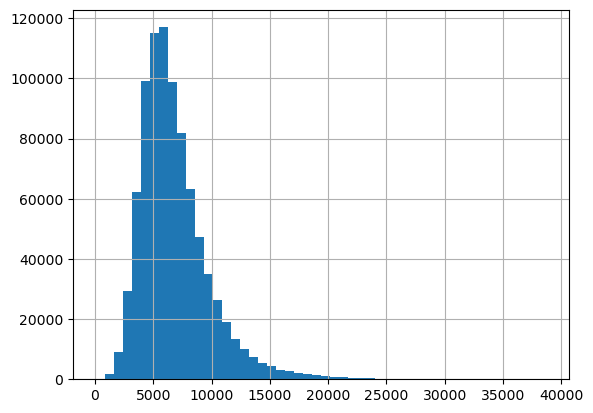

In [115]:
df2[df2['Sales'] != 0]['Sales(fill by mean)'].hist(bins=50)

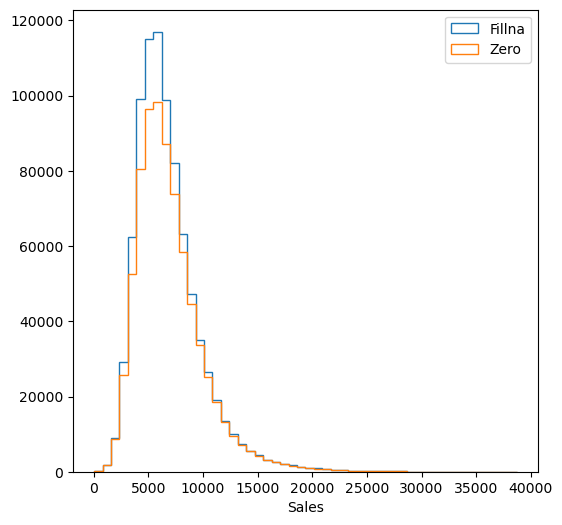

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.hist(df2[df2['Sales'] != 0]['Sales(fill by mean)'], histtype='step', bins= 50, label="Fillna")
plt.hist(df2[df2['Sales'] != 0]['Sales'], histtype='step', bins= 50, label="Zero")
plt.xlabel("Sales")
plt.legend();
